In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
model.compile(loss = 'binary_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4), metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./ 255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('/Users/amitjha/Downloads/cats_and_dogs_small/train',
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('/Users/amitjha/Downloads/cats_and_dogs_small/validation',
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps = 50
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 94s 939ms/step - loss: 0.6926 - acc: 0.5300 - val_loss: 0.6760 - val_acc: 0.5090
Epoch 2/30
100/100 [==============================] - 89s 895ms/step - loss: 0.6532 - acc: 0.6090 - val_loss: 0.6508 - val_acc: 0.6040
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6033 - acc: 0.6715 - val_loss: 0.6101 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 84s 839ms/step - loss: 0.5701 - acc: 0.7010 - val_loss: 0.5969 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 85s 846ms/step - loss: 0.5418 - acc: 0.7255 - val_loss: 0.5978 - val_acc: 0.6680
Epoch 6/30
100/100 [==============================] - 110s 1s/step - loss: 0.5140 - acc: 0.7495 - val_loss: 0.5838 - val_acc: 0.6910
Epoch 7/30
100/100 [=====

In [8]:
model.save('cats_and_dogs_small_1.h5')

In [10]:
import matplotlib.pyplot as plt

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [12]:
epochs = range(1,len(acc) +1)

Text(0.5, 1.0, 'Training and Validation Accuracy')

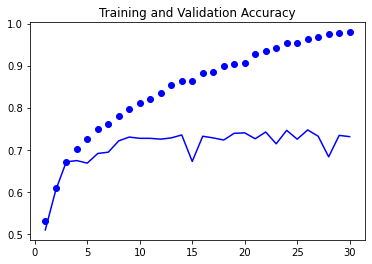

In [13]:
plt.plot(epochs, acc, 'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'b',label = 'Validation acc')
plt.title('Training and Validation Accuracy')


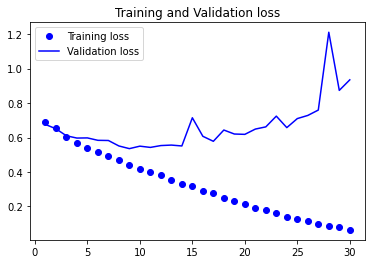

In [14]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

### Data Augmentation

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4), metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./ 255,
                                   rotation_range= 40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('/Users/amitjha/Downloads/cats_and_dogs_small/train',
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('/Users/amitjha/Downloads/cats_and_dogs_small/validation',
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 100,
                              validation_data = validation_generator,
                              validation_steps = 50
                              )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 93s 926ms/step - loss: 0.6925 - acc: 0.5090 - val_loss: 0.6844 - val_acc: 0.5010
Epoch 2/100
100/100 [==============================] - 85s 852ms/step - loss: 0.6822 - acc: 0.5475 - val_loss: 0.6667 - val_acc: 0.5680
Epoch 3/100
100/100 [==============================] - 89s 888ms/step - loss: 0.6684 - acc: 0.5825 - val_loss: 0.6402 - val_acc: 0.6160
Epoch 4/100
100/100 [==============================] - 96s 961ms/step - loss: 0.6524 - acc: 0.6110 - val_loss: 0.6264 - val_acc: 0.6350
Epoch 5/100
100/100 [==============================] - 229s 2s/step - loss: 0.6323 - acc: 0.6320 - val_loss: 0.6371 - val_acc: 0.6200
Epoch 6/100
100/100 [==============================] - 129s 1s/step - loss: 0.6165 - acc: 0.6635 - val_loss: 0.5951 - val_acc: 0.6680
Epoch 7/100
100/100 [==============================] - 98s 979ms/step - loss: 0.6077 - acc: 0.6

Epoch 60/100
100/100 [==============================] - 77s 771ms/step - loss: 0.4481 - acc: 0.7855 - val_loss: 0.4497 - val_acc: 0.7810
Epoch 61/100
100/100 [==============================] - 78s 776ms/step - loss: 0.4519 - acc: 0.7850 - val_loss: 0.4414 - val_acc: 0.7880
Epoch 62/100
100/100 [==============================] - 99s 993ms/step - loss: 0.4400 - acc: 0.7965 - val_loss: 0.4635 - val_acc: 0.7860
Epoch 63/100
100/100 [==============================] - 101s 1s/step - loss: 0.4365 - acc: 0.7960 - val_loss: 0.4400 - val_acc: 0.7990
Epoch 64/100
100/100 [==============================] - 102s 1s/step - loss: 0.4326 - acc: 0.8040 - val_loss: 0.5017 - val_acc: 0.7550
Epoch 65/100
100/100 [==============================] - 2309s 23s/step - loss: 0.4292 - acc: 0.8145 - val_loss: 0.4388 - val_acc: 0.7950
Epoch 66/100
100/100 [==============================] - 118s 1s/step - loss: 0.4269 - acc: 0.8020 - val_loss: 0.4694 - val_acc: 0.7810
Epoch 67/100
100/100 [=========================

In [23]:
model.save('cats_and_dogs_small_2.h5')

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc) +1)

Text(0.5, 1.0, 'Training and Validation Accuracy')

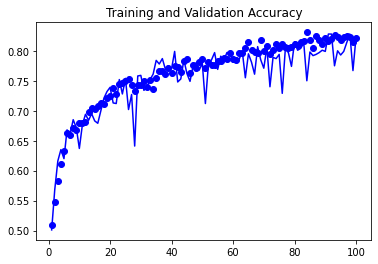

In [26]:
plt.plot(epochs, acc, 'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'b',label = 'Validation acc')
plt.title('Training and Validation Accuracy')


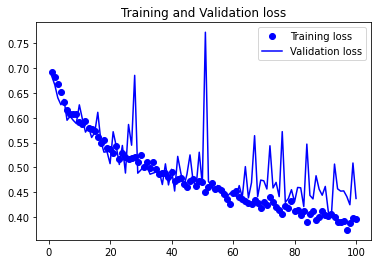

In [27]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()